# Transient Models

Example of randomly grabbing transient models by type from the `desisim.transients` module.

Transient models can also be accessed by name, which is demonstrated below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

from desisim.transients import transients

## Plotting Script

Given a transient model and a matplotlib Axes object, plot the flux vs. wavelength at peak flux, always defined to be at time 0.

In [2]:
def plot_transient(tr, ax):
    wlmin = np.maximum(2500., tr.minwave().value)
    wlmax = np.minimum(9500., tr.maxwave().value)
    wl = np.arange(wlmin, wlmax, 1.) * u.Angstrom
    t = 0*u.day
    ax.plot(wl, tr.flux(0*u.day, wl),
            label='{} ({})'.format(tr.model, tr.type))
    ax.set(xlabel=r'wavelength [$\AA$]',
           ylabel=r'flux [arb. units]')
    ax.legend(fontsize=10)

## Available Models

List transient models. Then pick one and plot it.

In [4]:
print(transients)

- Ia
  + hsiao
  + nugent-sn1a
  + nugent-sn91t
  + nugent-sn91bg
  + salt2-extended
- Ib
  + s11-2005hl
  + s11-2005hm
  + s11-2006jo
  + snana-2004gv
  + snana-2006ep
  + snana-2007y
  + snana-2004ib
  + snana-2005hm
  + snana-2007nc
- Ib/c
  + nugent-sn1bc
- Ic
  + s11-2006fo
  + snana-2004fe
  + snana-2004gq
  + snana-sdss004012
  + snana-2006fo
  + snana-sdss014475
  + snana-2006lc
  + snana-04d1la
  + snana-04d4jv
- IIn
  + nugent-sn2n
  + snana-2006ez
  + snana-2006ix
- IIP
  + nugent-sn2p
  + s11-2005lc
  + s11-2005gi
  + s11-2006jl
  + snana-2004hx
  + snana-2005gi
  + snana-2006gq
  + snana-2006kn
  + snana-2006jl
  + snana-2006iw
  + snana-2006kv
  + snana-2006ns
  + snana-2007iz
  + snana-2007nr
  + snana-2007kw
  + snana-2007ky
  + snana-2007lj
  + snana-2007lb
  + snana-2007ll
  + snana-2007nw
  + snana-2007ld
  + snana-2007md
  + snana-2007lz
  + snana-2007lx
  + snana-2007og
  + snana-2007nv
  + snana-2007pg
- IIL
  + nugent-sn2l
- IIL/P
  + s11-2004hx
- II-pec
  + snan

-20.0 d 85.0 d


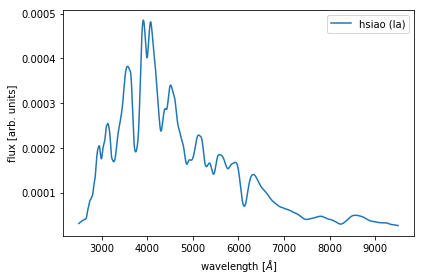

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4), tight_layout=True)
model = transients.get_model('hsiao')
print(model.mintime(), model.maxtime())
plot_transient(model, ax)

## Model Random Access

You can grab a model by type. The `desisim.transients` model will randomly select one of the avaialable models of that type. Types are just strings, and if you try one that is not available in the model you'll just get an exception.

Below, loop over several types, randomly select a model from each, and plot the spectrum from t0 (max light) for that model.

In [6]:
types = ['Ia', 'Ib', 'Ib/c', 'Ic', 'IIn', 'IIP', 'IIL', 'IIL/P', 'II-pec']
ntype = len(types)

{'model': 'salt2-extended', 'type': 'Ia', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 0. d>, 'snmodel': <sncosmo.models.Model object at 0x1820439a58>}
{'model': 'snana-2004gv', 'type': 'Ib', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 0. d>, 'snmodel': <sncosmo.models.Model object at 0x182049e550>}
{'model': 'nugent-sn1bc', 'type': 'Ib/c', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 20. d>, 'snmodel': <sncosmo.models.Model object at 0x18204b75c0>}
{'model': 'snana-2006fo', 'type': 'Ic', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 0. d>, 'snmodel': <sncosmo.models.Model object at 0x18207f8ef0>}
{'model': 'nugent-sn2n', 'type': 'IIn', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 20. d>, 'snmodel': <sncosmo.models.Model object at 0x1820803f98>}
{'model': 'snana-2007ld', 'type': 'IIP', 'hostratio': 1.0, 'phase': <Quantity 0. d>, 't0': <Quantity 0. d>, 'snmodel': <sncosmo.models.Model object at 0x18204a7278>}
{'m

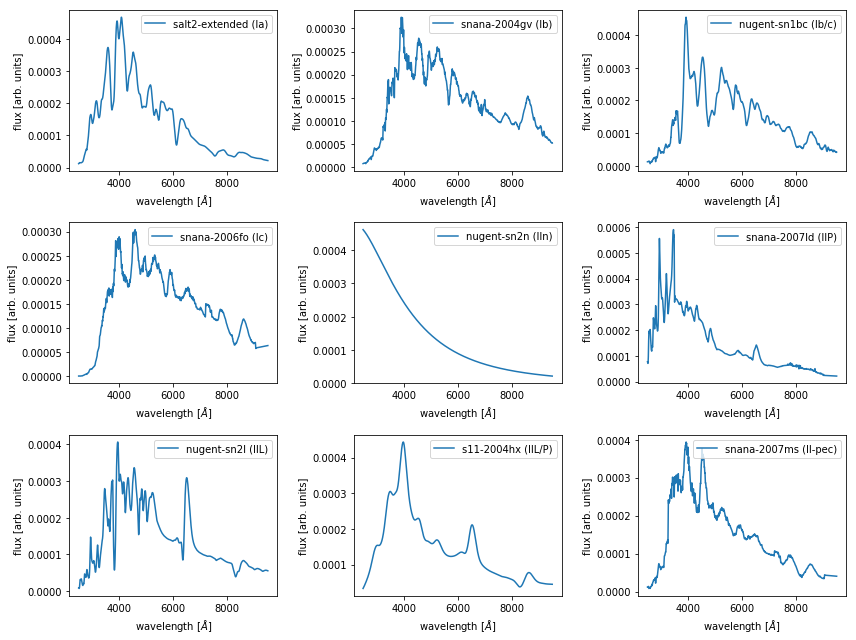

In [7]:
ncol = 3
nrow = int(np.ceil(ntype / ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow), tight_layout=True)
axes = axes.flatten()

for t, ax in zip(types, axes):
    s = transients.get_type(t)
    print(vars(s))
    plot_transient(s, ax)